In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load the epochs results
df = pd.read_csv("optuna_results.csv")

In [5]:
# Print columns
df.columns

Index(['trial', 'hidden_dim1', 'hidden_dim2', 'dropout_rate', 'activation',
       'use_batchnorm', 'lr', 'optimizer', 'batch_size', 'accuracy',
       'time_seconds'],
      dtype='object')

## Top 5 fastest and most accurate configurations

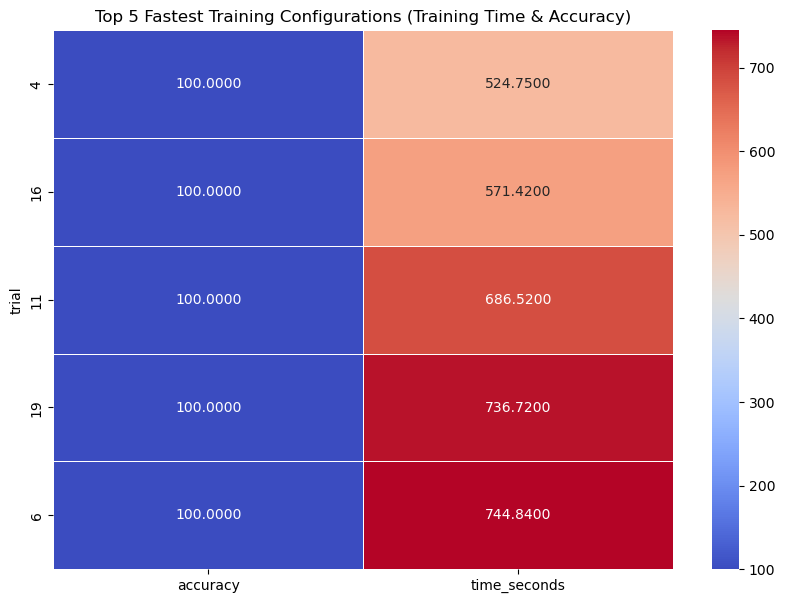

In [16]:
# Select the 10 fastest training times
best_db = df.sort_values(by=["accuracy", "time_seconds"], ascending=[False, True]).head(5)

# Set figure size
plt.figure(figsize=(10, 7))

# Create a heatmap for Training Time and Accuracy
sns.heatmap(
    best_db.set_index('trial')[["accuracy", "time_seconds"]],
    annot=True, fmt=".4f", cmap="coolwarm", linewidths=0.5, cbar=True
)

plt.title("Top 5 Fastest Training Configurations (Training Time & Accuracy)")
plt.show()


In [17]:
# Optional: improve aesthetics
sns.set(style="whitegrid", font_scale=1.2)

# Load your data (adjust path as needed)
# df = pd.read_csv("your_file.csv")

# Clean activation column to string names
df["activation"] = df["activation"].astype(str).str.extract(r"\.(\w+)'")

# Ensure categorical consistency
df["optimizer"] = df["optimizer"].astype(str)
df["activation"] = df["activation"].astype(str)

## Accuracy vs Training Time (colored by optimizer, shaped by activation)

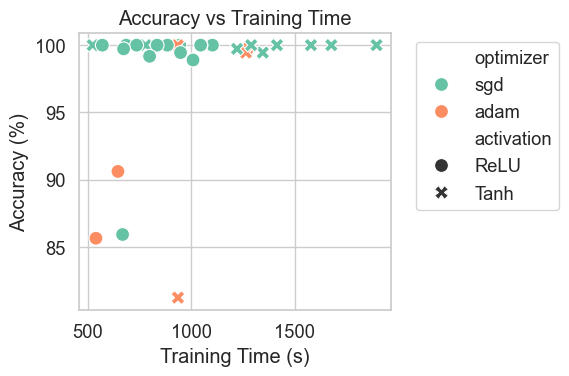

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="time_seconds",
    y="accuracy",
    hue="optimizer",
    style="activation",
    s=100,
    palette="Set2"
)
plt.title("Accuracy vs Training Time")
plt.xlabel("Training Time (s)")
plt.ylabel("Accuracy (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Accuracy Distribution by Optimizer

/var/folders/gp/jny7zmvj7k14txlpsyr_mrjr0000gn/T/ipykernel_4710/2217532878.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="optimizer", y="accuracy", palette="Pastel1")


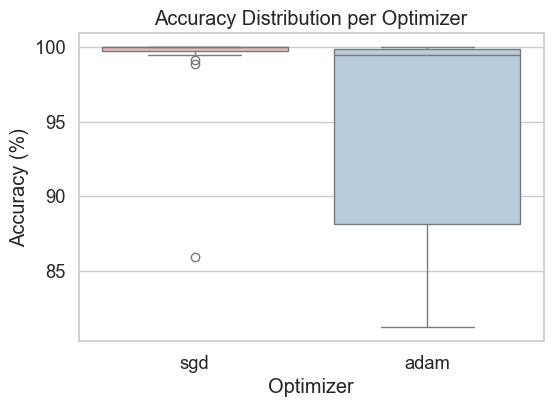

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="optimizer", y="accuracy", palette="Pastel1")
plt.title("Accuracy Distribution per Optimizer")
plt.xlabel("Optimizer")
plt.ylabel("Accuracy (%)")
plt.show()


## Training Time by Optimizer (Box Plot)

/var/folders/gp/jny7zmvj7k14txlpsyr_mrjr0000gn/T/ipykernel_4710/3221508917.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="optimizer", y="time_seconds", palette="Set3")


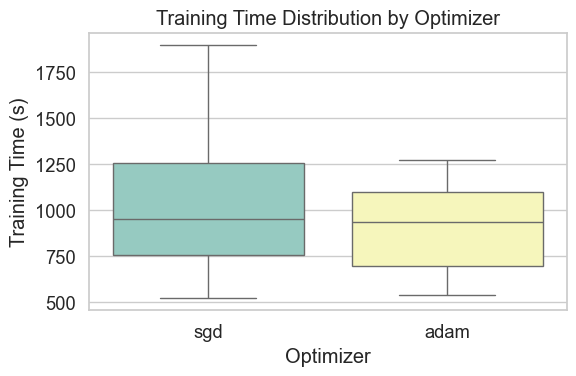

In [32]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x="optimizer", y="time_seconds", palette="Set3")
plt.title("Training Time Distribution by Optimizer")
plt.xlabel("Optimizer")
plt.ylabel("Training Time (s)")
plt.tight_layout()
plt.show()

## Training Time vs Dropout Rate

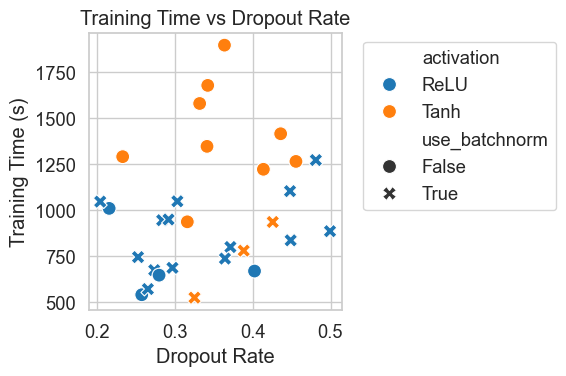

In [24]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="dropout_rate",
    y="time_seconds",
    hue="activation",
    style="use_batchnorm",
    palette="tab10",
    s=100
)
plt.title("Training Time vs Dropout Rate")
plt.xlabel("Dropout Rate")
plt.ylabel("Training Time (s)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Training Time vs Learning Rate

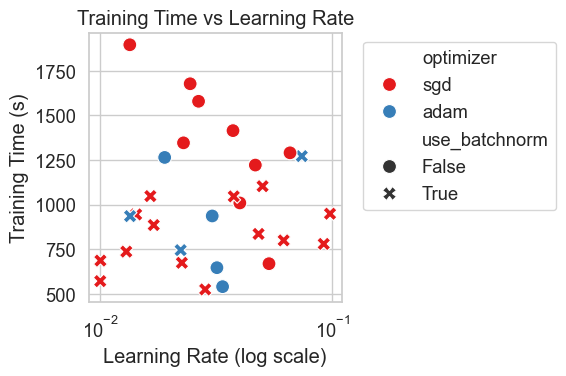

In [26]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="lr",
    y="time_seconds",
    hue="optimizer",
    style="use_batchnorm",
    palette="Set1",
    s=100
)
plt.xscale("log")
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Training Time (s)")
plt.title("Training Time vs Learning Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Training Time vs Hidden Layer Size

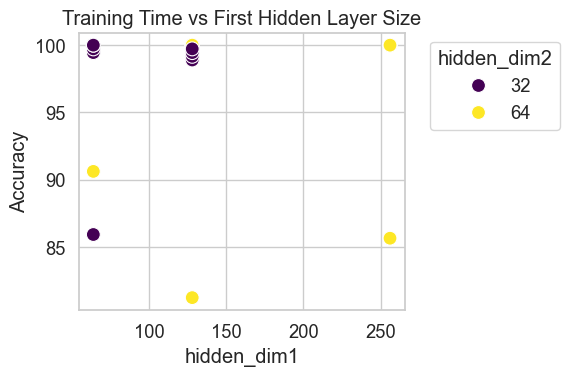

In [33]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    data=df,
    x="hidden_dim1",
    y="accuracy",
    hue="hidden_dim2",
    palette="viridis",
    s=100
)
plt.title("Training Time vs First Hidden Layer Size")
plt.xlabel("hidden_dim1")
plt.ylabel("Accuracy")
plt.legend(title="hidden_dim2", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()
